#Text Files to proper csv File.

This section comprises of the following steps:

* Extracting dataset from compressed rar file.
* Getting file-paths of *B* and *M* labelled data.
* Reading each text file line-by-line and converting it into one big space seperated line of sys-calls.
* Storing this data in a dataframe `final_data` in the format:  
 `(Filename, Sys-Calls, Label (B/M) )`





In [ ]:
!unrar x 'App Dataset.rar'  #Extract the Data

In [ ]:
!ls

'App Dataset'  'App Dataset.rar'   sample_data


In [ ]:
#Importing required libraries
import os   
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
B_dataset_path = os.getcwd() + '/App Dataset/Dataset/B/sys'     #Get file paths, for reading
M_dataset_path = os.getcwd() + '/App Dataset/Dataset/M/sys'

files_B = os.listdir(B_dataset_path)
files_M = os.listdir(M_dataset_path)
list_sys_calls = []

for filename in files_B:
    file = open( ( B_dataset_path + '/' + filename ), 'r' )
    sys_calls = file.read().splitlines()
    list_sys_calls.append([filename, ' '.join(sys_calls), 'B'])   #Store and label the data

for filename in files_M:
    file = open( ( M_dataset_path + '/' + filename ), 'r' )
    sys_calls = file.read().splitlines()
    list_sys_calls.append([filename, ' '.join(sys_calls), 'M'])

final_data = pd.DataFrame(list_sys_calls, columns=['File','Calls','Label'])
final_data      #Final dataframe of sys-calls, labeled

,File,Calls,Label
0,com.chinadeals.apk.sys_names.txt,ioctl pread rt_sigprocmask rt_sigprocmask rt_s...,B
1,chat.cristianogratis.apk.sys_names.txt,dup fcntl close epoll_ctl ioctl ioctl getuid e...,B
2,com.eterno.apk.sys_names.txt,futex ioctl epoll_pwait read recvfrom writev s...,B
3,com.andromo.dev551559.app531086.apk.sys_names.txt,read writev write read read write read read re...,B
4,com.blinkslabs.blinkist.android.apk.sys_names.txt,read read ioctl ioctl writev futex ioctl ioctl...,B
...,...,...,...
5817,a0bffc11168c65beb59c326d88f144f0d750634252a507...,newfstatat ioctl ioctl getuid newfstatat newfs...,M
5818,02c9bddf966b59a8850a7395e7ce5af21ca16c442a0389...,recvfrom recvfrom writev sendto getuid epoll_p...,M
5819,6113bc8bbbdfe89114a12ddfa25ad54eed63367cf21462...,dup fcntl close epoll_ctl ioctl ioctl getuid e...,M
5820,3ddcdc882166b87d3db9d5cc21ccd4c7009e1f134edeeb...,ioctl ioctl faccessat mprotect mprotect mprote...,M


# Task 1 - Analysis of Sys-Calls with different Unigram Models

**In this task, we analyse different models for representation of features, sys-calls. Sys-Calls are taken one at a time, hence they're Unigram Models.**  

For each data model, i.e., `Bag of Words`, `Boolean Occurrence` and `TF-IDF` the following steps are performed:
* Data is prepared by extracting the sys-calls from `final_data` and vectorizing it. The `CountVectorizer` is used for the first two models and `TfidfVectorizer` is used for TF-IDF.
* After this, the data is fit and transformed using the vectorizer. This data serves as the input variables, `X`. The Labels, `Y`, are extracted from `final_data`, being either `B/M` for each input.
* Data is split into train and test data.
* Three different SVM Kernels, `Linear`, `Polynomial` and `RBF` are trained and analysed.
 





## Bag of Words (No. of Occurrences of Calls)

This data model counts the occurence of a particular feature in the dataset.

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = final_data['Calls']
print(text)

0       ioctl pread rt_sigprocmask rt_sigprocmask rt_s...
1       dup fcntl close epoll_ctl ioctl ioctl getuid e...
2       futex ioctl epoll_pwait read recvfrom writev s...
3       read writev write read read write read read re...
4       read read ioctl ioctl writev futex ioctl ioctl...
                              ...                        
5817    newfstatat ioctl ioctl getuid newfstatat newfs...
5818    recvfrom recvfrom writev sendto getuid epoll_p...
5819    dup fcntl close epoll_ctl ioctl ioctl getuid e...
5820    ioctl ioctl faccessat mprotect mprotect mprote...
5821    getuid epoll_pwait getuid epoll_pwait read new...
Name: Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer()
transformed_text = vectorizer.fit_transform(text)
vectorizer.get_feature_names()[:5]      #First five features

['_llseek', 'bind', 'capget', 'clock_gettime', 'clone']

In [ ]:
from sklearn import preprocessing
X = transformed_text.toarray()
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.26287891,
        0.11385516],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16569688,
        0.1347668 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18283549,
        0.09310442],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.19940531,
        0.17339592],
       [0.        , 0.        , 0.        , ..., 0.        , 0.53886354,
        0.06260463],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01377167]])

In [ ]:
from sklearn import model_selection, svm        #Split the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9218884120171674

Confusion matrix:

[[480  30]
 [ 61 594]]

Classification Report:

              precision    recall  f1-score   support

           B       0.89      0.94      0.91       510
           M       0.95      0.91      0.93       655

    accuracy                           0.92      1165
   macro avg       0.92      0.92      0.92      1165
weighted avg       0.92      0.92      0.92      1165


ROC Plot


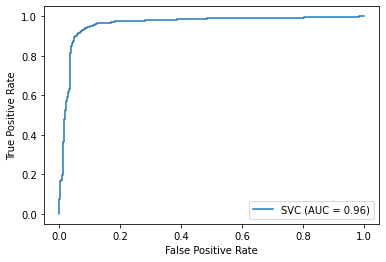

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9536480686695279

Confusion matrix:

[[486  24]
 [ 30 625]]

Classification Report:

              precision    recall  f1-score   support

           B       0.94      0.95      0.95       510
           M       0.96      0.95      0.96       655

    accuracy                           0.95      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.95      0.95      0.95      1165


ROC Plot


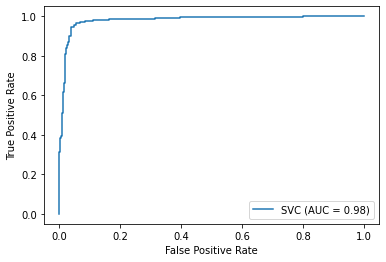

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.855793991416309

Confusion matrix:

[[468  42]
 [126 529]]

Classification Report:

              precision    recall  f1-score   support

           B       0.79      0.92      0.85       510
           M       0.93      0.81      0.86       655

    accuracy                           0.86      1165
   macro avg       0.86      0.86      0.86      1165
weighted avg       0.87      0.86      0.86      1165


ROC Plot


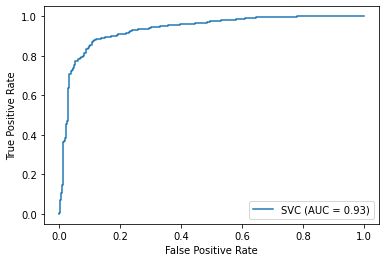

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## Boolean Occurrence

### Prepare the Data

In [ ]:
X = np.where(transformed_text.toarray() >= 1,1,0)       #Same as Bag of words, but Boolean. So all values >=1 are replaced with 1.
X

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
from sklearn import model_selection, svm        #Split the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9218884120171674

Confusion matrix:

[[480  30]
 [ 61 594]]

Classification Report:

              precision    recall  f1-score   support

           B       0.89      0.94      0.91       510
           M       0.95      0.91      0.93       655

    accuracy                           0.92      1165
   macro avg       0.92      0.92      0.92      1165
weighted avg       0.92      0.92      0.92      1165


ROC Plot


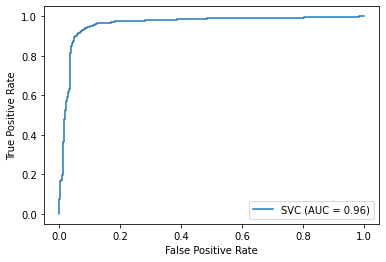

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9536480686695279

Confusion matrix:

[[486  24]
 [ 30 625]]

Classification Report:

              precision    recall  f1-score   support

           B       0.94      0.95      0.95       510
           M       0.96      0.95      0.96       655

    accuracy                           0.95      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.95      0.95      0.95      1165


ROC Plot


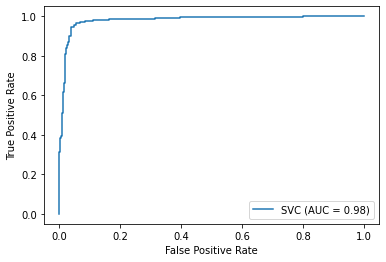

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.855793991416309

Confusion matrix:

[[468  42]
 [126 529]]

Classification Report:

              precision    recall  f1-score   support

           B       0.79      0.92      0.85       510
           M       0.93      0.81      0.86       655

    accuracy                           0.86      1165
   macro avg       0.86      0.86      0.86      1165
weighted avg       0.87      0.86      0.86      1165


ROC Plot


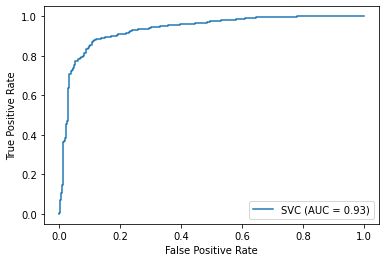

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## TF-IDF 

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text).toarray()

# print(X)
# print(vectorizer.vocabulary_)     

In [ ]:
from sklearn import model_selection, svm        #Split the data

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9218884120171674

Confusion matrix:

[[480  30]
 [ 61 594]]

Classification Report:

              precision    recall  f1-score   support

           B       0.89      0.94      0.91       510
           M       0.95      0.91      0.93       655

    accuracy                           0.92      1165
   macro avg       0.92      0.92      0.92      1165
weighted avg       0.92      0.92      0.92      1165


ROC Plot


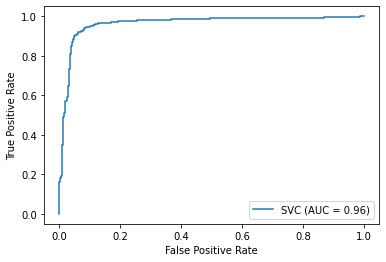

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9545064377682403

Confusion matrix:

[[487  23]
 [ 30 625]]

Classification Report:

              precision    recall  f1-score   support

           B       0.94      0.95      0.95       510
           M       0.96      0.95      0.96       655

    accuracy                           0.95      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.95      0.95      0.95      1165


ROC Plot


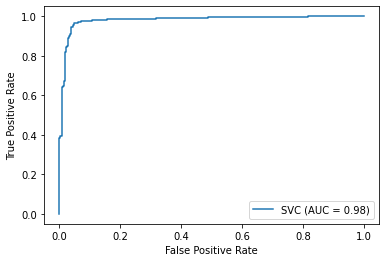

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.855793991416309

Confusion matrix:

[[468  42]
 [126 529]]

Classification Report:

              precision    recall  f1-score   support

           B       0.79      0.92      0.85       510
           M       0.93      0.81      0.86       655

    accuracy                           0.86      1165
   macro avg       0.86      0.86      0.86      1165
weighted avg       0.87      0.86      0.86      1165


ROC Plot


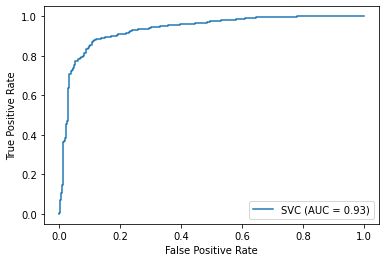

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

# Task 2 - Bigram Model

In this task, we now analyse two sequence of sys-calls. This task in therefore similar to the first task, the only difference being that we now use bigram models.

**For each `vectorizer`, we add a constraint - `ngram_range=(2,2)`.**

## Bag of Words

This data model counts the occurence of a particular feature in the dataset.

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = final_data['Calls']
print(text)

0       ioctl pread rt_sigprocmask rt_sigprocmask rt_s...
1       dup fcntl close epoll_ctl ioctl ioctl getuid e...
2       futex ioctl epoll_pwait read recvfrom writev s...
3       read writev write read read write read read re...
4       read read ioctl ioctl writev futex ioctl ioctl...
                              ...                        
5817    newfstatat ioctl ioctl getuid newfstatat newfs...
5818    recvfrom recvfrom writev sendto getuid epoll_p...
5819    dup fcntl close epoll_ctl ioctl ioctl getuid e...
5820    ioctl ioctl faccessat mprotect mprotect mprote...
5821    getuid epoll_pwait getuid epoll_pwait read new...
Name: Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2))
transformed_text = vectorizer.fit_transform(text)
vectorizer.get_feature_names()[:5]      #First five features

['_llseek _llseek',
 '_llseek clock_gettime',
 '_llseek close',
 '_llseek faccessat',
 '_llseek fcntl64']

In [ ]:
from sklearn import preprocessing
X = transformed_text.toarray()
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00826803,
        0.0950823 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00446945,
        0.14469859],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01349764,
        0.05736499],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.01105867,
        0.14376274],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00649589,
        0.04929233],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn import model_selection, svm        #Split the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9493562231759657

Confusion matrix:

[[494  16]
 [ 43 612]]

Classification Report:

              precision    recall  f1-score   support

           B       0.92      0.97      0.94       510
           M       0.97      0.93      0.95       655

    accuracy                           0.95      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.95      0.95      0.95      1165


ROC Plot


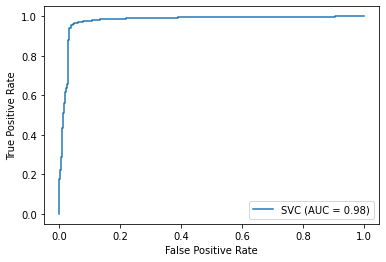

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9648068669527897

Confusion matrix:

[[491  19]
 [ 22 633]]

Classification Report:

              precision    recall  f1-score   support

           B       0.96      0.96      0.96       510
           M       0.97      0.97      0.97       655

    accuracy                           0.96      1165
   macro avg       0.96      0.96      0.96      1165
weighted avg       0.96      0.96      0.96      1165


ROC Plot


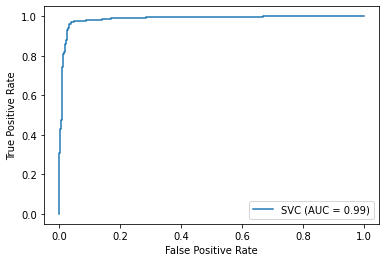

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.8566523605150215

Confusion matrix:

[[460  50]
 [117 538]]

Classification Report:

              precision    recall  f1-score   support

           B       0.80      0.90      0.85       510
           M       0.91      0.82      0.87       655

    accuracy                           0.86      1165
   macro avg       0.86      0.86      0.86      1165
weighted avg       0.86      0.86      0.86      1165


ROC Plot


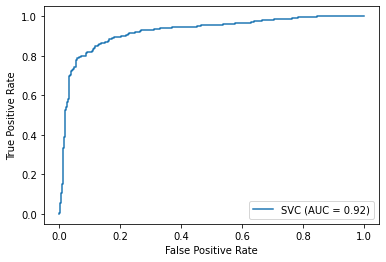

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## Boolean Occurrence

### Prepare the Data

In [ ]:
X = np.where(transformed_text.toarray() >= 1,1,0)       #Same as Bag of words, but Boolean. So all values >=1 are replaced with 1.
X

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn import model_selection, svm        #Split the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9682403433476395

Confusion matrix:

[[499  11]
 [ 26 629]]

Classification Report:

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       510
           M       0.98      0.96      0.97       655

    accuracy                           0.97      1165
   macro avg       0.97      0.97      0.97      1165
weighted avg       0.97      0.97      0.97      1165


ROC Plot


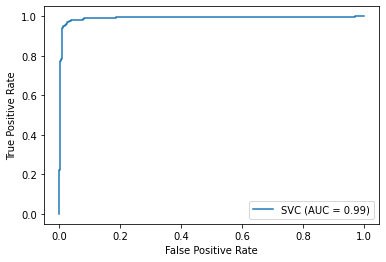

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9682403433476395

Confusion matrix:

[[480  30]
 [  7 648]]

Classification Report:

              precision    recall  f1-score   support

           B       0.99      0.94      0.96       510
           M       0.96      0.99      0.97       655

    accuracy                           0.97      1165
   macro avg       0.97      0.97      0.97      1165
weighted avg       0.97      0.97      0.97      1165


ROC Plot


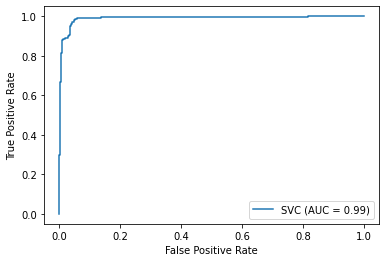

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.975107296137339

Confusion matrix:

[[489  21]
 [  8 647]]

Classification Report:

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       510
           M       0.97      0.99      0.98       655

    accuracy                           0.98      1165
   macro avg       0.98      0.97      0.97      1165
weighted avg       0.98      0.98      0.98      1165


ROC Plot


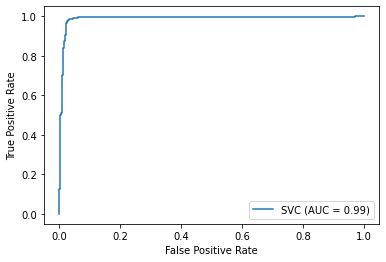

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1.5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## TF-IDF 

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(text).toarray()

# print(X)
# print(vectorizer.vocabulary_)

In [ ]:
from sklearn import model_selection, svm        #Split the data

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9390557939914163

Confusion matrix:

[[490  20]
 [ 51 604]]

Classification Report:

              precision    recall  f1-score   support

           B       0.91      0.96      0.93       510
           M       0.97      0.92      0.94       655

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165


ROC Plot


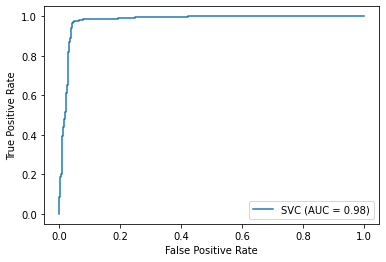

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9553648068669528

Confusion matrix:

[[489  21]
 [ 31 624]]

Classification Report:

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       510
           M       0.97      0.95      0.96       655

    accuracy                           0.96      1165
   macro avg       0.95      0.96      0.95      1165
weighted avg       0.96      0.96      0.96      1165


ROC Plot


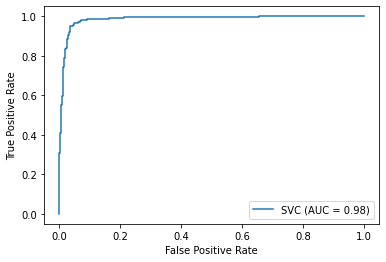

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1, kernel='poly', degree=3)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.8600858369098713

Confusion matrix:

[[468  42]
 [121 534]]

Classification Report:

              precision    recall  f1-score   support

           B       0.79      0.92      0.85       510
           M       0.93      0.82      0.87       655

    accuracy                           0.86      1165
   macro avg       0.86      0.87      0.86      1165
weighted avg       0.87      0.86      0.86      1165


ROC Plot


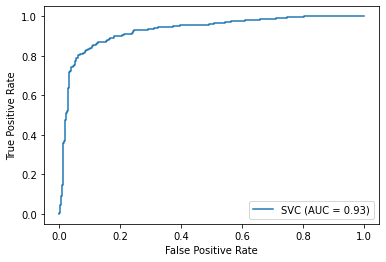

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=5, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

# Task 2 - Tigram Model

We now analyse three sequence of sys-calls.  
**We change `ngram_range` to `(3,3)` and repeat the steps in the earlier tasks.**

## Bag of Words (No. of Occurrences of Calls)

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = final_data['Calls']
print(text)

0       ioctl pread rt_sigprocmask rt_sigprocmask rt_s...
1       dup fcntl close epoll_ctl ioctl ioctl getuid e...
2       futex ioctl epoll_pwait read recvfrom writev s...
3       read writev write read read write read read re...
4       read read ioctl ioctl writev futex ioctl ioctl...
                              ...                        
5817    newfstatat ioctl ioctl getuid newfstatat newfs...
5818    recvfrom recvfrom writev sendto getuid epoll_p...
5819    dup fcntl close epoll_ctl ioctl ioctl getuid e...
5820    ioctl ioctl faccessat mprotect mprotect mprote...
5821    getuid epoll_pwait getuid epoll_pwait read new...
Name: Calls, Length: 5822, dtype: object


In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
transformed_text = vectorizer.fit_transform(text)
vectorizer.get_feature_names()[:5]      #First five features

['_llseek _llseek _llseek',
 '_llseek _llseek clock_gettime',
 '_llseek _llseek close',
 '_llseek _llseek fcntl64',
 '_llseek _llseek futex']

In [ ]:
from sklearn import preprocessing
X = transformed_text.toarray()
X = preprocessing.normalize(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00053259,
        0.0958666 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15532401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05505922],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15491933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05260622],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn import model_selection, svm        #Split the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9570815450643777

Confusion matrix:

[[492  18]
 [ 32 623]]

Classification Report:

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       510
           M       0.97      0.95      0.96       655

    accuracy                           0.96      1165
   macro avg       0.96      0.96      0.96      1165
weighted avg       0.96      0.96      0.96      1165


ROC Plot


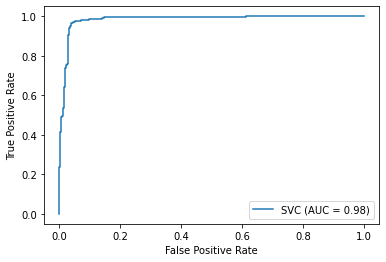

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9605150214592275

Confusion matrix:

[[489  21]
 [ 25 630]]

Classification Report:

              precision    recall  f1-score   support

           B       0.95      0.96      0.96       510
           M       0.97      0.96      0.96       655

    accuracy                           0.96      1165
   macro avg       0.96      0.96      0.96      1165
weighted avg       0.96      0.96      0.96      1165


ROC Plot


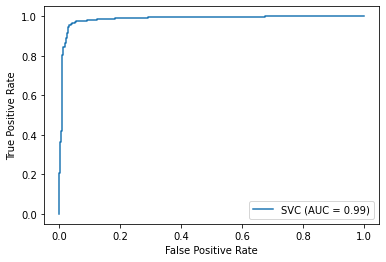

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.5622317596566524

Confusion matrix:

[[  0 510]
 [  0 655]]

Classification Report:

              precision    recall  f1-score   support

           B       0.00      0.00      0.00       510
           M       0.56      1.00      0.72       655

    accuracy                           0.56      1165
   macro avg       0.28      0.50      0.36      1165
weighted avg       0.32      0.56      0.40      1165


ROC Plot


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


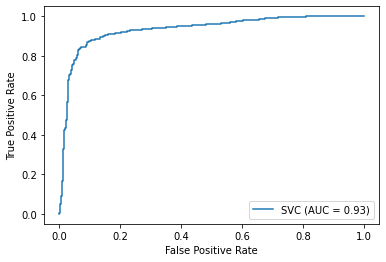

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## Boolean Occurrence

### Prepare the Data

In [ ]:
X = np.where(transformed_text.toarray() >= 1,1,0)
X

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn import model_selection, svm
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9836909871244636

Confusion matrix:

[[498  12]
 [  7 648]]

Classification Report:

              precision    recall  f1-score   support

           B       0.99      0.98      0.98       510
           M       0.98      0.99      0.99       655

    accuracy                           0.98      1165
   macro avg       0.98      0.98      0.98      1165
weighted avg       0.98      0.98      0.98      1165


ROC Plot


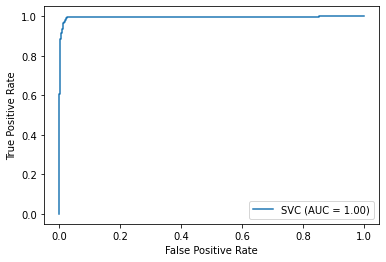

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.944206008583691

Confusion matrix:

[[455  55]
 [ 10 645]]

Classification Report:

              precision    recall  f1-score   support

           B       0.98      0.89      0.93       510
           M       0.92      0.98      0.95       655

    accuracy                           0.94      1165
   macro avg       0.95      0.94      0.94      1165
weighted avg       0.95      0.94      0.94      1165


ROC Plot


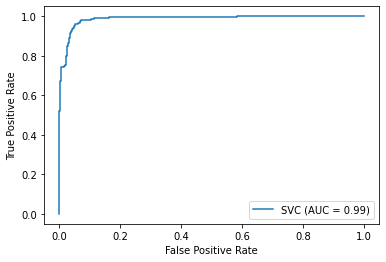

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.9725321888412017

Confusion matrix:

[[486  24]
 [  8 647]]

Classification Report:

              precision    recall  f1-score   support

           B       0.98      0.95      0.97       510
           M       0.96      0.99      0.98       655

    accuracy                           0.97      1165
   macro avg       0.97      0.97      0.97      1165
weighted avg       0.97      0.97      0.97      1165


ROC Plot


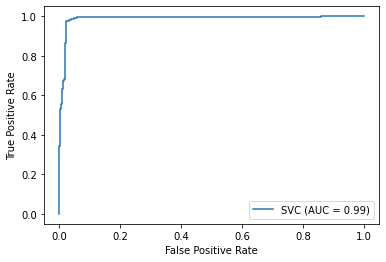

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

## TF-IDF 

### Prepare the Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(text).toarray()

# print(X)
# print(vectorizer.vocabulary_)

In [ ]:
from sklearn import model_selection, svm

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, final_data['Label'], test_size=0.2 , random_state=45 )

### Linear SVM Kernel

Linear Kernel accuracy is  0.9545064377682403

Confusion matrix:

[[493  17]
 [ 36 619]]

Classification Report:

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       510
           M       0.97      0.95      0.96       655

    accuracy                           0.95      1165
   macro avg       0.95      0.96      0.95      1165
weighted avg       0.96      0.95      0.95      1165


ROC Plot


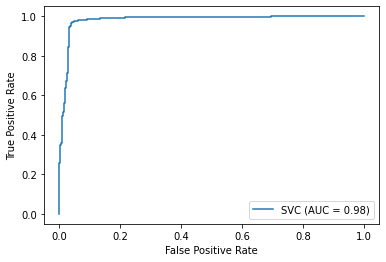

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Linear_Kernel = svm.SVC(C=1.5, kernel='linear', gamma='auto')
Linear_Kernel.fit(X_train,Y_train)

#predictions
Linear_Kernel_Predictions = Linear_Kernel.predict(X_test)

#accuracy score
print("Linear Kernel accuracy is ", accuracy_score(Linear_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Linear_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Linear_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Linear_Kernel, X_test, Y_test) 
plt.show()

### Polynomial SVM Kernel

Polynomial Kernel accuracy is  0.9639484978540772

Confusion matrix:

[[494  16]
 [ 26 629]]

Classification Report:

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       510
           M       0.98      0.96      0.97       655

    accuracy                           0.96      1165
   macro avg       0.96      0.96      0.96      1165
weighted avg       0.96      0.96      0.96      1165


ROC Plot


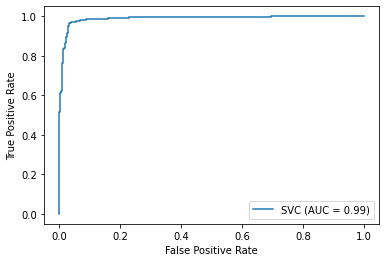

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
Polynomial_Kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
Polynomial_Kernel.fit(X_train,Y_train)

#predictions
Polynomial_Kernel_Predictions = Polynomial_Kernel.predict(X_test)

#accuracy score
print("Polynomial Kernel accuracy is ", accuracy_score(Polynomial_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,Polynomial_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,Polynomial_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(Polynomial_Kernel, X_test, Y_test) 
plt.show()

### RBF SVM Kernel

RBF Kernel accuracy is  0.5622317596566524

Confusion matrix:

[[  0 510]
 [  0 655]]

Classification Report:

              precision    recall  f1-score   support

           B       0.00      0.00      0.00       510
           M       0.56      1.00      0.72       655

    accuracy                           0.56      1165
   macro avg       0.28      0.50      0.36      1165
weighted avg       0.32      0.56      0.40      1165


ROC Plot


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


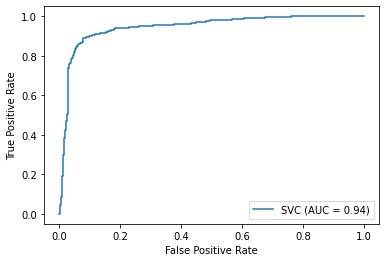

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
RBF_Kernel = svm.SVC(C=1, kernel='rbf', gamma='auto')
RBF_Kernel.fit(X_train,Y_train)

#predictions
RBF_Kernel_Predictions = RBF_Kernel.predict(X_test)

#accuracy score
print("RBF Kernel accuracy is ", accuracy_score(RBF_Kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,RBF_Kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,RBF_Kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(RBF_Kernel, X_test, Y_test) 
plt.show()

# Task 3 - Feature Selection

**This task is an attempt to find the best features in two and three sequence models of sys-calls.**  
For both these data models, the following steps are performed:
* The data is vectorized using the `TfidfVectorizer` with `ngram_range` being `(2,2)` and `(3,3)` for bigram and trigram respectfully.
* A light-weight model, `DecisionTreeClassifier` is trained with `max-features = 30`. This is to find the features with most **Feature Importance**.
* Finally, a bar graph is plot between the top 30 features and their feature importance.  

Additionally, for the 2 sequence data model, a Polynomial SVM Kernel is trained and analysed.

## Feature selection for 2 sequence


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = final_data['Calls']
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(text)
X

<5822x2425 sparse matrix of type '<class 'numpy.float64'>'
	with 1192807 stored elements in Compressed Sparse Row format>

In [ ]:
bigram_features = list(vectorizer.vocabulary_.keys())
print(bigram_features[:7])

['ioctl pread', 'pread rt_sigprocmask', 'rt_sigprocmask rt_sigprocmask', 'rt_sigprocmask openat', 'openat ioctl', 'ioctl ioctl', 'ioctl mmap']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Y = final_data['Label']

model = DecisionTreeClassifier(max_features=30)
model.fit(X,Y)

feature_df = pd.DataFrame(list(zip(model.feature_importances_,bigram_features)), columns = ['Feature Importance', 'Features'])
feature_df = feature_df.sort_values(by='Feature Importance',ascending=False)
print("Top 30 features (2 Sequence):")
feature_df.head(n=30)

Top 30 features (2 Sequence):


,Feature Importance,Features
1805,0.202945,fcntl64 ftruncate
1101,0.107995,fstat64 close
1400,0.072044,sendto getrlimit
2355,0.058309,clone prctl
1817,0.056940,ioctl geteuid
1206,0.039688,sendmsg getuid
1025,0.032005,geteuid32 openat
1035,0.022775,prctl clock_gettime
2320,0.020981,openat readlinkat
1019,0.019145,mmap2 faccessat


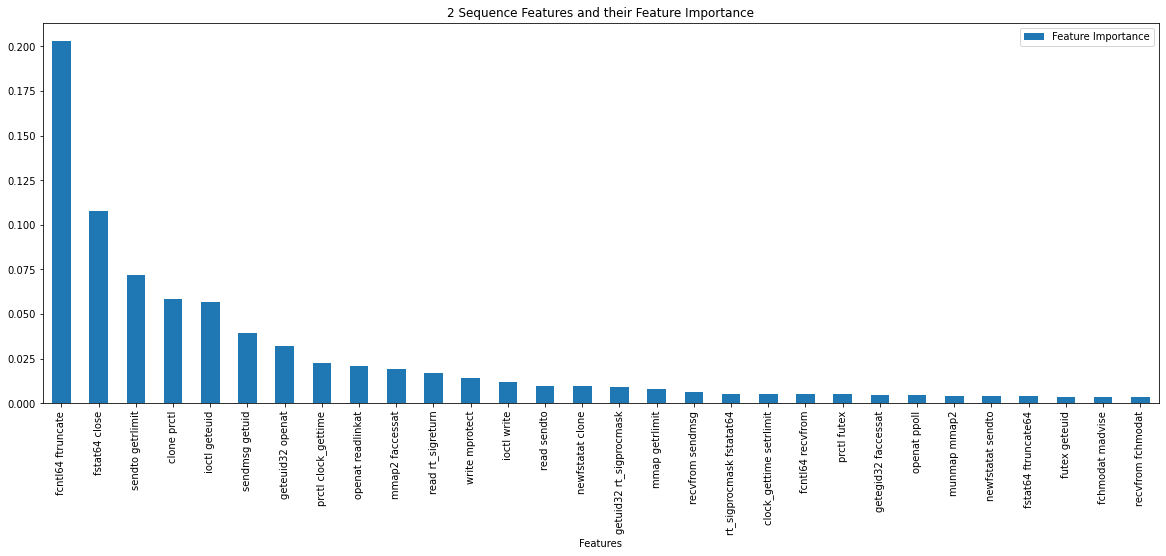

In [ ]:
feature_df.iloc[:30].plot(x = 'Features', y = 'Feature Importance', kind = 'bar', figsize = (20,7), title = '2 Sequence Features and their Feature Importance')

## Model for 2 sequence based on top 30 features

### Prepare the Data

In [ ]:
bigram_tfidf_data = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
bigram_tfidf_data['File'] = final_data['File']
cols = list(bigram_tfidf_data.columns)
cols = [cols[-1]] + cols[:-1]
bigram_tfidf_data = bigram_tfidf_data[cols]

In [ ]:
bigram_tfidf_data

,File,_llseek _llseek,_llseek clock_gettime,_llseek close,_llseek faccessat,_llseek fcntl64,_llseek fstat64,_llseek fstatat64,_llseek ftruncate64,_llseek futex,_llseek madvise,_llseek mmap2,_llseek mprotect,_llseek openat,_llseek read,_llseek write,bind fcntl,bind getsockname,bind ppoll,bind setsockopt,bind socket,capget futex,clock_gettime _llseek,clock_gettime clock_gettime,clock_gettime clone,clock_gettime close,clock_gettime dup,clock_gettime epoll_ctl,clock_gettime epoll_pwait,clock_gettime faccessat,clock_gettime fchmodat,clock_gettime fcntl64,clock_gettime fstat,clock_gettime fstat64,clock_gettime fstatat64,clock_gettime futex,clock_gettime getcwd,clock_gettime getdents64,clock_gettime getppid,clock_gettime getpriority,...,writev getpriority,writev getrlimit,writev getsockname,writev getsockopt,writev gettid,writev gettimeofday,writev getuid,writev getuid32,writev ioctl,writev lseek,writev madvise,writev mkdirat,writev mmap,writev mmap2,writev mprotect,writev munmap,writev newfstatat,writev openat,writev pipe2,writev prctl,writev pread,writev pread64,writev read,writev readlinkat,writev recvfrom,writev renameat,writev rt_sigprocmask,writev rt_sigreturn,writev sched_yield,writev sendmsg,writev sendto,writev setsockopt,writev shutdown,writev socket,writev socketpair,writev statfs,writev statfs64,writev unlinkat,writev write,writev writev
0,com.chinadeals.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004131,0.0,0.021507,0.0,0.000719,0.0,0.000000,0.0,0.000561,0.0,0.000000,0.000000,0.0,0.0,0.001105,0.0,0.0,0.0,0.012714,0.0,0.0,0.000000,0.0,0.0,0.040869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008550,0.097165
1,chat.cristianogratis.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003076,0.0,0.018292,0.0,0.000000,0.0,0.000000,0.0,0.001504,0.0,0.000000,0.000000,0.0,0.0,0.002961,0.0,0.0,0.0,0.008520,0.0,0.0,0.000000,0.0,0.0,0.054214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004584,0.146641
2,com.eterno.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002461,0.0,0.018298,0.0,0.000963,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.026785,0.0,0.0,0.002219,0.0,0.0,0.034663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013755,0.057768
3,com.andromo.dev551559.app531086.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007407,0.0,0.016861,0.0,0.003051,0.0,0.005238,0.0,0.000953,0.0,0.000000,0.000000,0.0,0.0,0.001407,0.0,0.0,0.0,0.011955,0.0,0.0,0.000000,0.0,0.0,0.027980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005446,0.081086
4,com.blinkslabs.blinkist.android.apk.sys_names.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.055908,0.0,0.050377,0.0,0.002135,0.0,0.000000,0.0,0.003335,0.0,0.000000,0.002643,0.0,0.0,0.003281,0.0,0.0,0.0,0.016187,0.0,0.0,0.000000,0.0,0.0,0.071856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013970,0.282377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,a0bffc11168c65beb59c326d88f144f0d750634252a507...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
a = list(feature_df['Features'].head(n=30))
top30_bigram_tfidf_data = bigram_tfidf_data[a]
top30_bigram_tfidf_data

,fcntl64 ftruncate,fstat64 close,sendto getrlimit,clone prctl,ioctl geteuid,sendmsg getuid,geteuid32 openat,prctl clock_gettime,openat readlinkat,mmap2 faccessat,read rt_sigreturn,write mprotect,ioctl write,read sendto,newfstatat clone,getuid32 rt_sigprocmask,mmap getrlimit,recvfrom sendmsg,rt_sigprocmask fstatat64,clock_gettime setrlimit,fcntl64 recvfrom,prctl futex,getegid32 faccessat,openat ppoll,munmap mmap2,newfstatat sendto,fstat64 ftruncate64,futex geteuid,fchmodat madvise,recvfrom fchmodat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.076253,0.000736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001013,0.061870,0.000986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.104438,0.004931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001284,0.036406,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.094285,0.004371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.230257,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.051092,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022006,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.063488,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train the model on top 30 features

In [ ]:
from sklearn import model_selection, svm

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( top30_bigram_tfidf_data, final_data['Label'], test_size=0.2 , random_state=45 )

For Polynomial Kernel trained on top30, features accuracy is  0.5871244635193134

Confusion matrix:

[[ 33 477]
 [  4 651]]

Classification Report:

              precision    recall  f1-score   support

           B       0.89      0.06      0.12       510
           M       0.58      0.99      0.73       655

    accuracy                           0.59      1165
   macro avg       0.73      0.53      0.43      1165
weighted avg       0.71      0.59      0.46      1165


ROC Plot


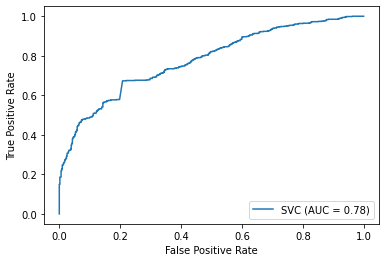

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

#train model
top30_feature_kernel = svm.SVC(C=1.5, kernel='poly', degree=4)
top30_feature_kernel.fit(X_train,Y_train)

#predictions
top30_feature_kernel_Predictions = top30_feature_kernel.predict(X_test)

#accuracy score
print("For Polynomial Kernel trained on top30, features accuracy is ", accuracy_score(top30_feature_kernel_Predictions, Y_test))

#Confusion Matrix
print("\nConfusion matrix:\n")
print(confusion_matrix(Y_test,top30_feature_kernel_Predictions))

#Classification Report for the rest of the metrics
print("\nClassification Report:\n")
print(classification_report(Y_test,top30_feature_kernel_Predictions))

#ROC Plot
print("\nROC Plot")
plot_roc_curve(top30_feature_kernel, X_test, Y_test) 
plt.show()

## Feature selection for 3 sequence


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = final_data['Calls']
vectorizer = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range=(3,3))
X = vectorizer.fit_transform(text)
X

<5822x23331 sparse matrix of type '<class 'numpy.float64'>'
	with 3442893 stored elements in Compressed Sparse Row format>

In [ ]:
trigram_features = list(vectorizer.vocabulary_.keys())
print(trigram_features[:7])

['ioctl pread rt_sigprocmask', 'pread rt_sigprocmask rt_sigprocmask', 'rt_sigprocmask rt_sigprocmask rt_sigprocmask', 'rt_sigprocmask rt_sigprocmask openat', 'rt_sigprocmask openat ioctl', 'openat ioctl ioctl', 'ioctl ioctl mmap']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Y = final_data['Label']

model = DecisionTreeClassifier(max_features=15)
model.fit(X,Y)

feature_df = pd.DataFrame(list(zip(model.feature_importances_,trigram_features)), columns = ['Feature Importance', 'Features'])
feature_df = feature_df.sort_values(by='Feature Importance',ascending=False)
print("Top 30 features (3 Sequence):")
feature_df.head(n=15)

Top 30 features (3 Sequence):


,Feature Importance,Features
22452,0.109745,ioctl writev fsync
20601,0.062664,read newfstatat mmap
9315,0.047965,mprotect futex pipe2
479,0.042854,ioctl epoll_pwait read
10624,0.028177,munmap write pread64
21798,0.021520,ioctl epoll_ctl rt_sigprocmask
13829,0.019237,clone getuid32 dup
17760,0.015724,madvise mprotect fchmodat
11238,0.014135,futex madvise fcntl
21807,0.013475,getuid sendto clock_gettime


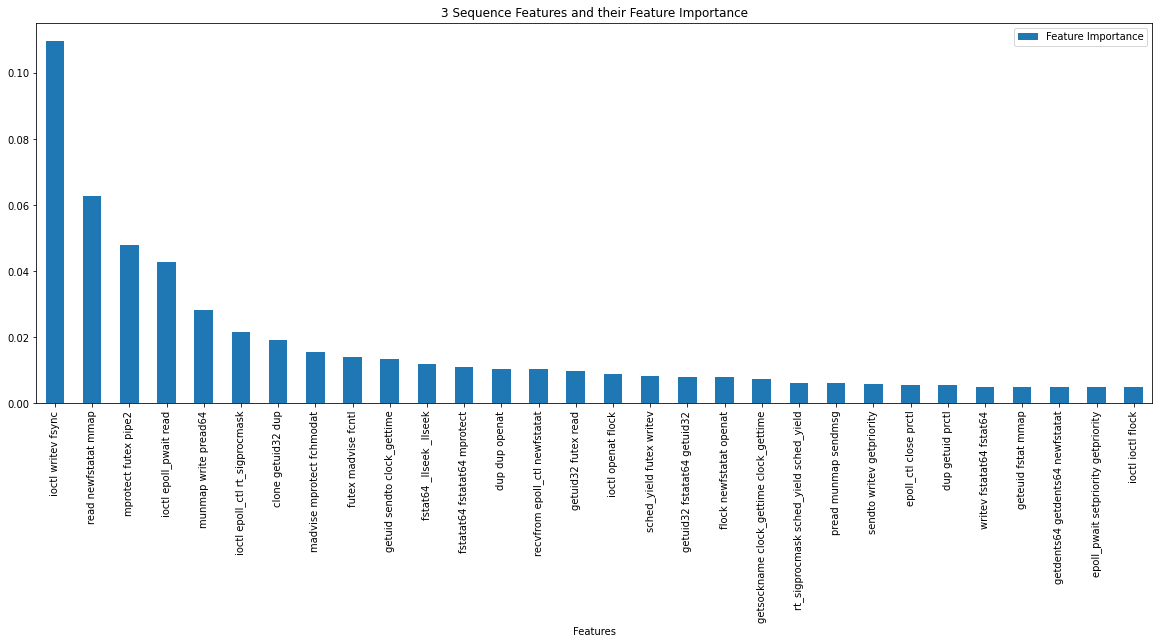

In [ ]:
feature_df.iloc[:30].plot(x = 'Features', y = 'Feature Importance', kind = 'bar', figsize = (20,7), title = '3 Sequence Features and their Feature Importance')

# Task 4 - Clustering Techniques

This task is an attempt to understand three different clustering methods, namely - `K Means`, `Hierarchial Clustering` and `DBSCAN`.  
This task has been performed in the following steps - 
* First, the data has been prepared. The sys-calls have been vectorized, fit and transformed using `TfidfVectorizer`. This is stored in a DataFrame `unigram_tfidf_data`. Then, we find the top 30 features by training this data using `ExtraTreesClassifier` and . Finally, we extract the data of these top 30 features from `X` and store it in a DataFrame, `top30_features_data`.  

* `K Means` clustering is performed on data from `top30_features_data`. A `KMeans` model is fit with number of clusters from 1 to 5. Then, a graph of `Number of Clusters` vs `Within Cluster Sum of Squares`. This is done to find optimum number of clusters, i.e., **The Elbow Method**.  Finally, a graph is plotted for two random features and their cluster number.

* `Hierarchial Clustering` is performed. The data from `top30_features_data` is trained on an `AgglomerativeClustering` model and optimum number of clusters are found. and a graph is plotted for two random features and their cluster number.  

* `DBSCAN` clustering is performed. The data from `top30_features_data` is trained on a `DBSCAN` model and optimum number of clusters are found. Finally, a graph is plotted for two random features and their cluster number.

## Preparing the Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = final_data['Calls']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

In [ ]:
features = list(vectorizer.vocabulary_.keys())
print(features[:7])

['ioctl', 'pread', 'rt_sigprocmask', 'openat', 'mmap', 'close', 'mprotect']


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
Y = final_data['Label']

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,Y)

feature_df = pd.DataFrame(list(zip(model.feature_importances_,features)), columns = ['Feature Importance', 'Features'])
feature_df = feature_df.sort_values(by='Feature Importance',ascending=False)
print("Top 30 features:")
feature_df.head(n=30)

Top 30 features:


,Feature Importance,Features
70,0.162134,ftruncate
65,0.072768,connect
100,0.072081,eventfd2
45,0.043114,lseek
49,0.042371,rt_sigaction
25,0.032815,setpriority
10,0.032499,futex
40,0.031677,pipe2
43,0.031334,getdents64
3,0.026308,openat


In [ ]:
unigram_tfidf_data = pd.DataFrame(X.toarray(), columns = features)
unigram_tfidf_data

,ioctl,pread,rt_sigprocmask,openat,mmap,close,mprotect,madvise,getuid,epoll_pwait,futex,munmap,newfstatat,read,writev,write,readlinkat,socketpair,fcntl,clone,dup,epoll_ctl,prctl,recvfrom,sendto,setpriority,getrlimit,setrlimit,sched_yield,faccessat,renameat,fstat,fsync,fchmodat,unlinkat,getpriority,geteuid,pwrite,fdatasync,rt_sigreturn,...,geteuid32,pwrite64,sigaction,connect,gettid,ftruncate64,statfs64,tkill,ftruncate,getcwd,tgkill,flock,nanosleep,mknodat,mremap,msync,mlock,munlock,getpid,stat64,getegid32,setsockopt,bind,getsockname,listen,sigreturn,shutdown,fchmod,utimensat,kill,getegid,uname,capget,wait4,inotify_add_watch,inotify_rm_watch,sched_getparam,sched_getscheduler,eventfd2,ugetrlimit
0,0.0,0.0,0.0,0.0,0.000593,0.027595,0.0,0.007276,0.000000,0.015406,0.486590,0.0,0.000311,0.0,0.000000,0.005856,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.031091,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000635,0.0,0.0,0.0,0.0,...,0.015287,0.000000,0.0,0.001213,0.082410,0.0,0.000000,0.0,0.180168,0.000548,0.518655,0.000000,0.0,0.078882,0.000000,0.0,0.0,0.016333,0.000000,0.314580,0.000568,0.000869,0.0,0.0,0.0,0.0,0.0,0.001107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.267231,0.113144
1,0.0,0.0,0.0,0.0,0.000730,0.019107,0.0,0.007357,0.000000,0.018643,0.317636,0.0,0.001533,0.0,0.002168,0.008582,0.0,0.000000,0.0,0.001552,0.0,0.0,0.003028,0.0,0.0,0.032454,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.003393,0.000000,0.0,0.000000,0.075191,0.0,0.000000,0.0,0.101963,0.000000,0.646377,0.003333,0.0,0.009277,0.000000,0.0,0.0,0.027168,0.000000,0.570744,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003208,0.0,0.0,0.166216,0.132157
2,0.0,0.0,0.0,0.0,0.005048,0.021287,0.0,0.003402,0.000000,0.009913,0.207178,0.0,0.008152,0.0,0.000000,0.037601,0.0,0.005264,0.0,0.048700,0.0,0.0,0.000000,0.0,0.0,0.038095,0.0,0.00000,0.0,0.0,0.016554,0.0,0.0,0.000000,0.007138,0.000000,0.0,0.0,0.0,0.0,...,0.012138,0.000000,0.0,0.001190,0.046529,0.0,0.011429,0.0,0.054056,0.000000,0.672197,0.000000,0.0,0.011181,0.000550,0.0,0.0,0.002889,0.000000,0.600475,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.182486,0.090842
3,0.0,0.0,0.0,0.0,0.009158,0.047608,0.0,0.011388,0.000873,0.011964,0.509608,0.0,0.000310,0.0,0.000000,0.006944,0.0,0.000000,0.0,0.001256,0.0,0.0,0.000000,0.0,0.0,0.083732,0.0,0.00117,0.0,0.0,0.000000,0.0,0.0,0.000778,0.000000,0.001266,0.0,0.0,0.0,0.0,...,0.041685,0.000824,0.0,0.000906,0.181729,0.0,0.000000,0.0,0.035253,0.000545,0.355259,0.000000,0.0,0.122102,0.000418,0.0,0.0,0.000000,0.001446,0.295408,0.000566,0.000000,0.0,0.0,0.0,0.0,0.0,0.001654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.081974,0.111689
4,0.0,0.0,0.0,0.0,0.005554,0.068540,0.0,0.014597,0.000000,0.032828,0.316841,0.0,0.015825,0.0,0.003533,0.095480,0.0,0.023663,0.0,0.093607,0.0,0.0,0.000000,0.0,0.0,0.163663,0.0,0.00000,0.0,0.0,0.035704,0.0,0.0,0.000000,0.020056,0.000000,0.0,0.0,0.0,0.0,...,0.033517,0.000000,0.0,0.001622,0.200713,0.0,0.057323,0.0,0.067061,0.000000,0.435994,0.000000,0.0,0.034942,0.000000,0.0,0.0,0.004723,0.000000,0.352753,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.156857,0.271705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.0,0.007177,0.065576,0.0,0.044014,0.000000,0.006318,0.374608,0.0,0.000000,0.0,0.000000,0.006748,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.042127,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.018191,0.000000,0.0,0.000000,0.114669,0.0,0.000000,0.0,0.523352,0.000000,0.124806,0.000000,0.0,0.072940,0.000000,0.0,0.0,0.000000,0.00

In [ ]:
top30_features = feature_df['Features'].head(n=30)
pd.DataFrame(top30_features)

,Features
70,ftruncate
65,connect
100,eventfd2
45,lseek
49,rt_sigaction
25,setpriority
10,futex
40,pipe2
43,getdents64
3,openat


In [ ]:
top30_features_data = unigram_tfidf_data[top30_features]
top30_features_data

,ftruncate,connect,eventfd2,lseek,rt_sigaction,setpriority,futex,pipe2,getdents64,openat,tgkill,stat64,mmap2,unlinkat,mknodat,gettid,madvise,epoll_pwait,setsockopt,fstatat64,clock_gettime,geteuid32,fchmodat,_llseek,close,getuid,epoll_create1,getcwd,mmap,ugetrlimit
0,0.180168,0.001213,0.267231,0.363398,0.007414,0.031091,0.486590,0.354401,0.0,0.0,0.518655,0.314580,0.011139,0.000000,0.078882,0.082410,0.007276,0.015406,0.000869,0.003671,0.061185,0.015287,0.000000,0.037761,0.027595,0.000000,0.0,0.000548,0.000593,0.113144
1,0.101963,0.000000,0.166216,0.259153,0.001574,0.032454,0.317636,0.146693,0.0,0.0,0.646377,0.570744,0.003352,0.000000,0.009277,0.075191,0.007357,0.018643,0.000000,0.010428,0.040061,0.003393,0.000000,0.035167,0.019107,0.000000,0.0,0.000000,0.000730,0.132157
2,0.054056,0.001190,0.182486,0.232233,0.018742,0.038095,0.207178,0.184826,0.0,0.0,0.672197,0.600475,0.030783,0.007138,0.011181,0.046529,0.003402,0.009913,0.000000,0.032159,0.025903,0.012138,0.000000,0.016260,0.021287,0.000000,0.0,0.000000,0.005048,0.090842
3,0.035253,0.000906,0.081974,0.356077,0.017824,0.083732,0.509608,0.539019,0.0,0.0,0.355259,0.295408,0.038214,0.000000,0.122102,0.181729,0.011388,0.011964,0.000000,0.005062,0.142625,0.041685,0.000778,0.086848,0.047608,0.000873,0.0,0.000545,0.009158,0.111689
4,0.067061,0.001622,0.156857,0.513908,0.005471,0.163663,0.316841,0.309751,0.0,0.0,0.435994,0.352753,0.027146,0.020056,0.034942,0.200713,0.014597,0.032828,0.000000,0.060425,0.110035,0.033517,0.000000,0.080404,0.068540,0.000000,0.0,0.000000,0.005554,0.271705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.523352,0.000000,0.429397,0.528391,0.024743,0.042127,0.374608,0.244462,0.0,0.0,0.124806,0.000000,0.005989,0.000000,0.072940,0.114669,0.044014,0.006318,0.000000,0.020497,0.125992,0.018191,0.000000,0.054098,0.065576,0.000000,0.0,0.000000,0.007177,0.006084
5818,0.354499,0.000239,0.380667,0.279326,0.049914,0.060897,0.470133,0.487238,0.0,0.0,0.304561,0.264275,0.012667,0.000000,0.087613,0.006426,0.007774,0.007195,0.000000,0.003112,0.012503,0.002762,0.000000,0.008410,0.016487,0.000000,0.0,0.000000,0.000701,0.124109
5819,0.170535,0.031548,0.205216,0.493704,0.008869,0.017257,0.281335,0.305562,0.0,0.0,0.026841,0.000000,0.395003,0.000000,0.540318,0.009134,0.027045,0.027176,0.000000,0.039183,0.108385,0.043469,0.000000,0.051708,0.094020,0.000000,0.0,0.000000,0.020579,0.174446
5820,0.493119,0.001947,0.548576,0.352653,0.034256,0.004794,0.203664,0.193298,0.0,0.0,0.350787,0.312150,0.016584,0.000000,0.112742,0.071283,0.017649,0.022527,0.000000,0.007515,0.060454,0.015870,0.000000,0.040811,0.049521,0.000000,0.0,0.000000,0.000544,0.062303


## K-Means

### Finding optimum number of clusters using elbow method

In [ ]:
from sklearn.cluster import KMeans
WCSS = []

for cluster in range(1,6):
    kmeans = KMeans(n_clusters= cluster, init='k-means++', random_state=0)
    kmeans.fit(top30_features_data)
    print("Cluster", cluster, "done!")
    WCSS.append(kmeans.inertia_)

Cluster 1 done!
Cluster 2 done!
Cluster 3 done!
Cluster 4 done!
Cluster 5 done!


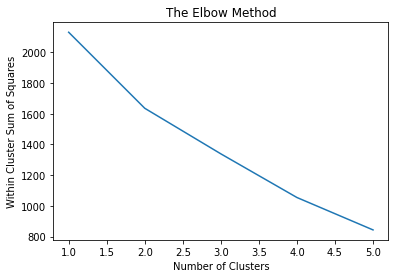

In [ ]:
plt.plot(range(1,6), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()      #Elbow is at 2, therefore 2 is the optimum number of clusters

### Model Creation with optimum number of clusters


In [ ]:
two_cluster_kmeans = KMeans(n_clusters= 2, init='k-means++', random_state=0)
random_two_features = top30_features_data.iloc[:,[6,9]]
random_two_features_model = two_cluster_kmeans.fit(random_two_features)
random_two_features

,futex,openat
0,0.486590,0.0
1,0.317636,0.0
2,0.207178,0.0
3,0.509608,0.0
4,0.316841,0.0
...,...,...
5817,0.374608,0.0
5818,0.470133,0.0
5819,0.281335,0.0
5820,0.203664,0.0


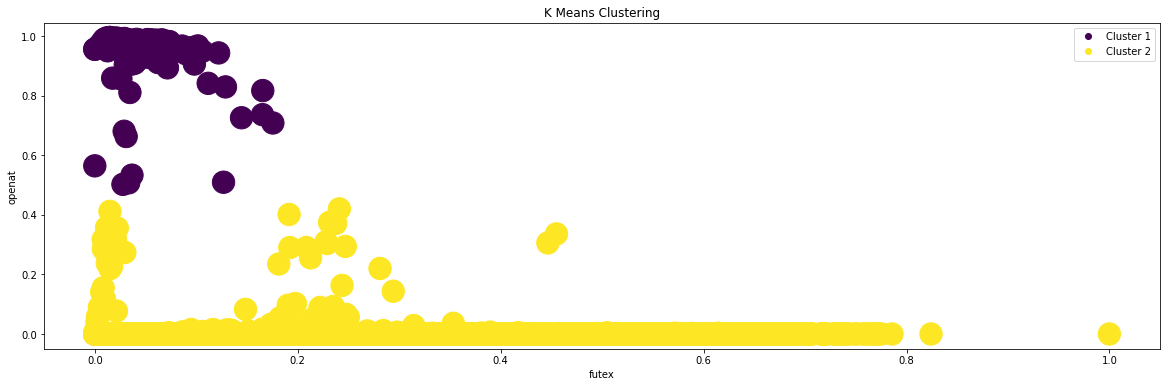

In [ ]:
# random_two_features
plt.figure(figsize=(20, 6))
plt.scatter(random_two_features['futex'], random_two_features['openat'], c=random_two_features_model.labels_.astype(float), label=['Cluster1','Cluster2'], s=500)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2'])
plt.xlabel('futex')
plt.ylabel('openat')
plt.title('K Means Clustering')
plt.show()

## Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

two_cluster_HC = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
two_cluster_HC_model = two_cluster_HC.fit(random_two_features)

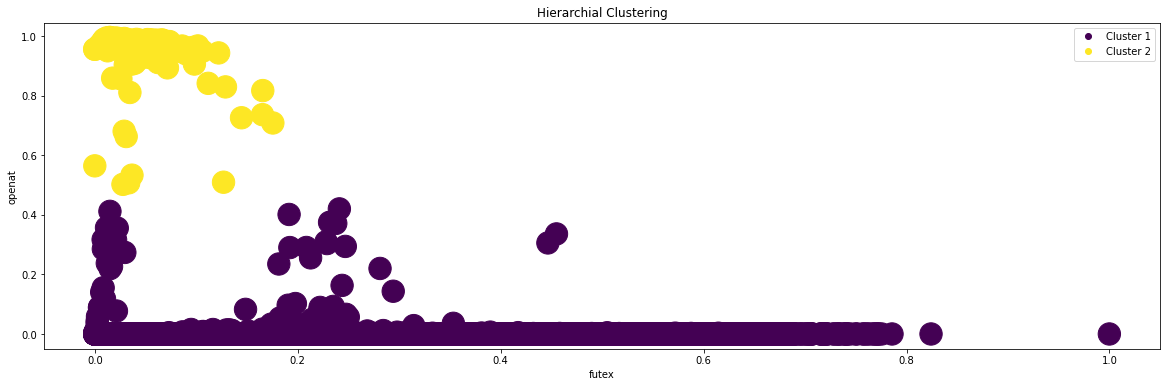

In [ ]:
# random_two_features
plt.figure(figsize=(20, 6))
plt.scatter(random_two_features['futex'], random_two_features['openat'], c=two_cluster_HC_model.labels_.astype(float), label=['Cluster1','Cluster2'], s=500)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2'])
plt.xlabel('futex')
plt.ylabel('openat')
plt.title('Hierarchial Clustering')
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
two_feature_DB=DBSCAN(eps=10,min_samples=5,metric='euclidean')
two_feature_DB.fit(random_two_features)
print("Optimum No. of clusters, according to DBSCAN = ", len(set(two_feature_DB.labels_)))

Optimum No. of clusters, according to DBSCAN =  1


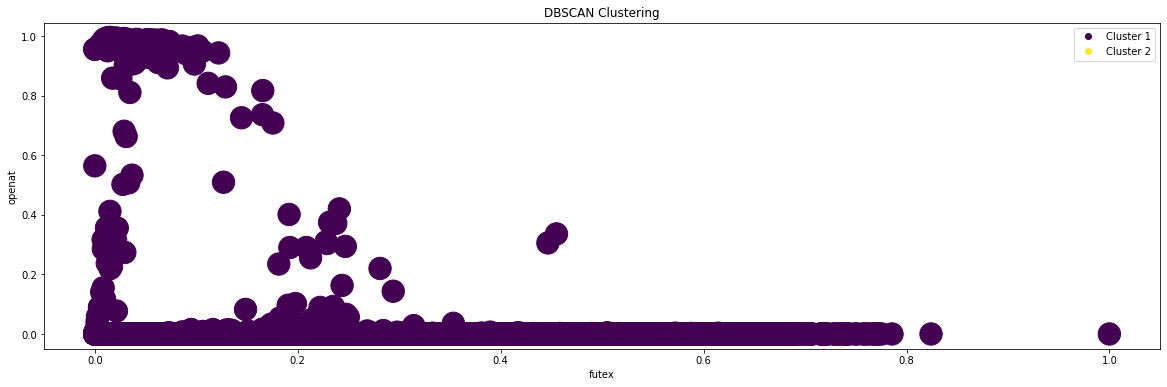

In [ ]:
# random_two_features
plt.figure(figsize=(20, 6))
plt.scatter(random_two_features['futex'], random_two_features['openat'], c=two_feature_DB.labels_.astype(float), label=['Cluster1','Cluster2'], s=500)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2'])
plt.xlabel('futex')
plt.ylabel('openat')
plt.title('DBSCAN Clustering')
plt.show()

# Conclusion

In this series of tasks, analysis of sys-calls has been done. A sequence of sys-calls is either labeled as B/M.     

---

In the first two tasks, we see that the two sequence/bigram models produce the most convincing results, with `TF-IDF` being the most effective vectorizing technique.  
Trigram models take significantly longer time to train, with marginal better accuracy in some cases. Some RBF models crashed the runtime while training, which is the reason for some errors in `classification_report`.

---

In the third task, we find the top features in two sequence and three sequence models. These features are plot to analyse visually. The model prepared with the top 30 two sequence features gives un-satisfactory output. Bigram models trained on all features are still the better models.

---

In the last task, we use three different clustering techniques to cluster sys-calls sequences into clusters. From the three techniques performed, we find that two clusters are the ideal number of clusters in the data.